In [31]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
# Suppose we have an output layer with 10 unitis
np.random.seed(4242)
outputs = np.random.normal(size=10)


def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    exp_x = np.exp(x - np.max(x))  # Subtracting max(x) for numerical stability
    return exp_x / exp_x.sum(axis=0)

def maximum_activation(x):
    """Returns 1 for the maximum probability and 0 for others."""
    max_index = np.argmax(x)
    result = np.zeros_like(x)
    result[max_index] = 1
    return result



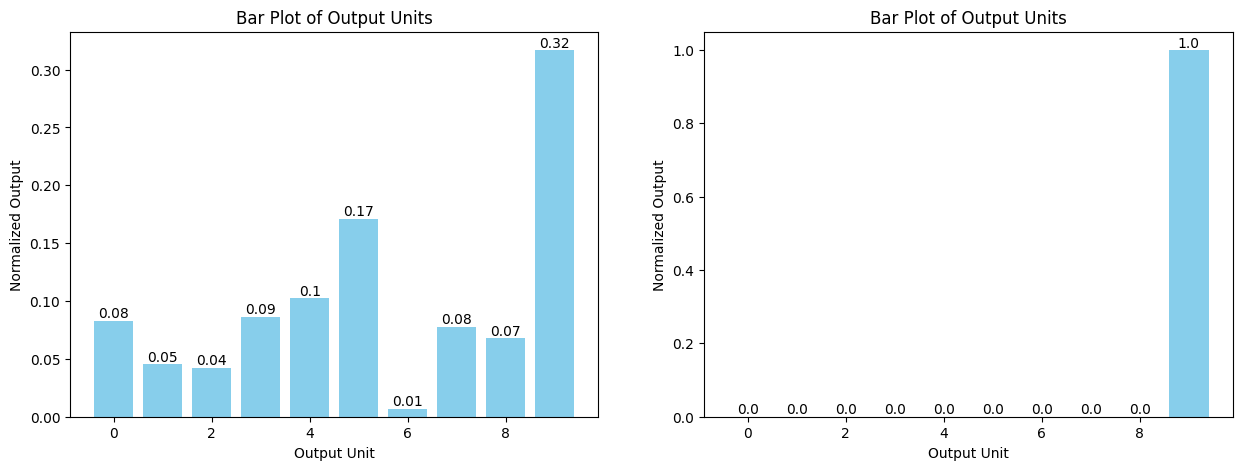

In [33]:
# Create a bar plot

fig, ax = plt.subplots(ncols=2, figsize=(15, 5))
bars = ax[0].bar(range(len(outputs)), softmax(outputs), color='skyblue')
ax[0].set_xlabel('Output Unit')
ax[0].set_ylabel('Normalized Output')
ax[0].set_title('Bar Plot of Output Units')

# Annotate values on top of bars
for bar, value in zip(bars, softmax(outputs)):
    ax[0].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(value, 2),
             ha='center', va='bottom')

bars = ax[1].bar(range(len(outputs)), maximum_activation(outputs), color='skyblue')

ax[1].set_xlabel('Output Unit')
ax[1].set_ylabel('Normalized Output')
ax[1].set_title('Bar Plot of Output Units')

# Annotate values on top of bars
for bar, value in zip(bars, maximum_activation(outputs)):
    ax[1].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(value, 2),
             ha='center', va='bottom')
plt.show()

In [34]:
# Greedy sampling
np.argmax(softmax(outputs))

9

In [35]:
# Greedy sampling as a stochastic sampler
pvals = maximum_activation(softmax(outputs))
print("Probabilities=", pvals)

sample = np.random.multinomial(n=1, pvals=pvals)
print("Sample=", sample)

print(np.argmax(sample))

Probabilities= [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Sample= [0 0 0 0 0 0 0 0 0 1]
9


In [38]:
# Softmax sampling

pvals = softmax(outputs)
print("Probabilities=", pvals)

sample = np.random.multinomial(n=1, pvals=pvals)
print("Sample=", sample)

print(np.argmax(sample))


Probabilities= [0.0828305  0.04541053 0.04221387 0.0864671  0.10267691 0.17111643
 0.00687004 0.07787882 0.06765909 0.31687671]
Sample= [0 0 0 0 1 0 0 0 0 0]
4


In [39]:
count = 0
n_iter = 10_000

for _ in range(n_iter):
    sample = np.random.multinomial(n=1, pvals=pvals)
    sample = np.argmax(sample)

    if sample == 9:
        count+=1

In [40]:
count/n_iter

0.3113

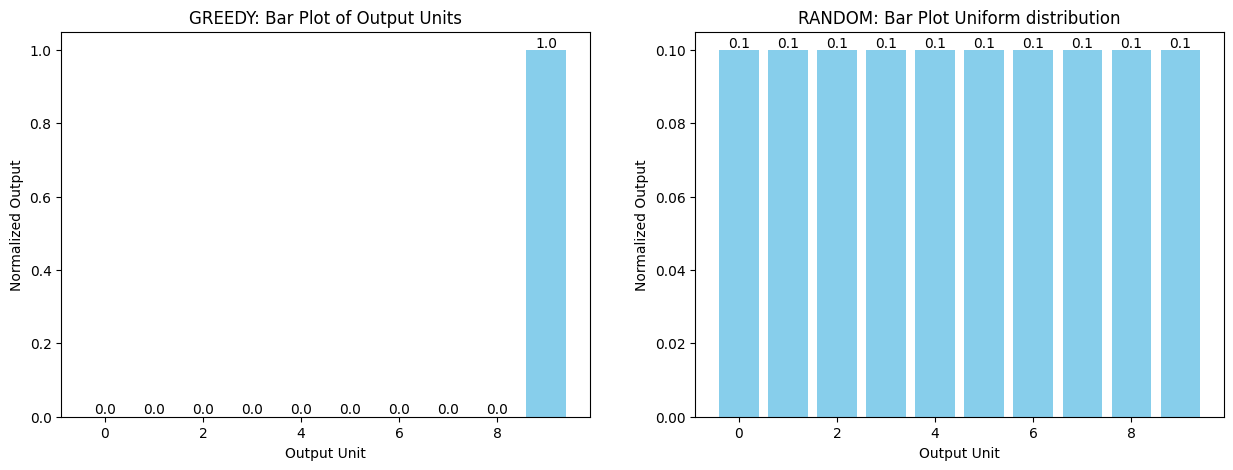

In [41]:
# Create a bar plot

fig, ax = plt.subplots(ncols=2, figsize=(15, 5))
bars = ax[1].bar(range(len(outputs)), [1/10]*10, color='skyblue')
ax[1].set_xlabel('Output Unit')
ax[1].set_ylabel('Normalized Output')
ax[1].set_title('RANDOM: Bar Plot Uniform distribution')

# Annotate values on top of bars
for bar, value in zip(bars, [1/10]*10):
    ax[1].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(value, 2),
             ha='center', va='bottom')

bars = ax[0].bar(range(len(outputs)), maximum_activation(outputs), color='skyblue')

ax[0].set_xlabel('Output Unit')
ax[0].set_ylabel('Normalized Output')
ax[0].set_title('GREEDY: Bar Plot of Output Units')

# Annotate values on top of bars
for bar, value in zip(bars, maximum_activation(outputs)):
    ax[0].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(value, 2),
             ha='center', va='bottom')
plt.show()

In [ ]:
def reweight_distribution(original_distribution, temperature=0.5):
    distribution = np.log(original_distribution) / temperature
    distribution = np.exp(distribution)
    return distribution / np.sum(distribution)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0.   0.   0.   0.   0.   0.04 0.   0.   0.   0.95]
[0.02 0.01 0.   0.03 0.04 0.15 0.   0.02 0.01 0.71]
[0.05 0.02 0.02 0.06 0.08 0.18 0.   0.05 0.04 0.5 ]
[0.07 0.03 0.03 0.08 0.09 0.18 0.   0.07 0.06 0.39]
[0.08 0.05 0.04 0.09 0.1  0.17 0.01 0.08 0.07 0.32]
[0.09 0.06 0.06 0.1  0.11 0.15 0.02 0.09 0.08 0.23]
[0.1  0.1  0.09 0.1  0.1  0.11 0.08 0.1  0.1  0.12]
[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]


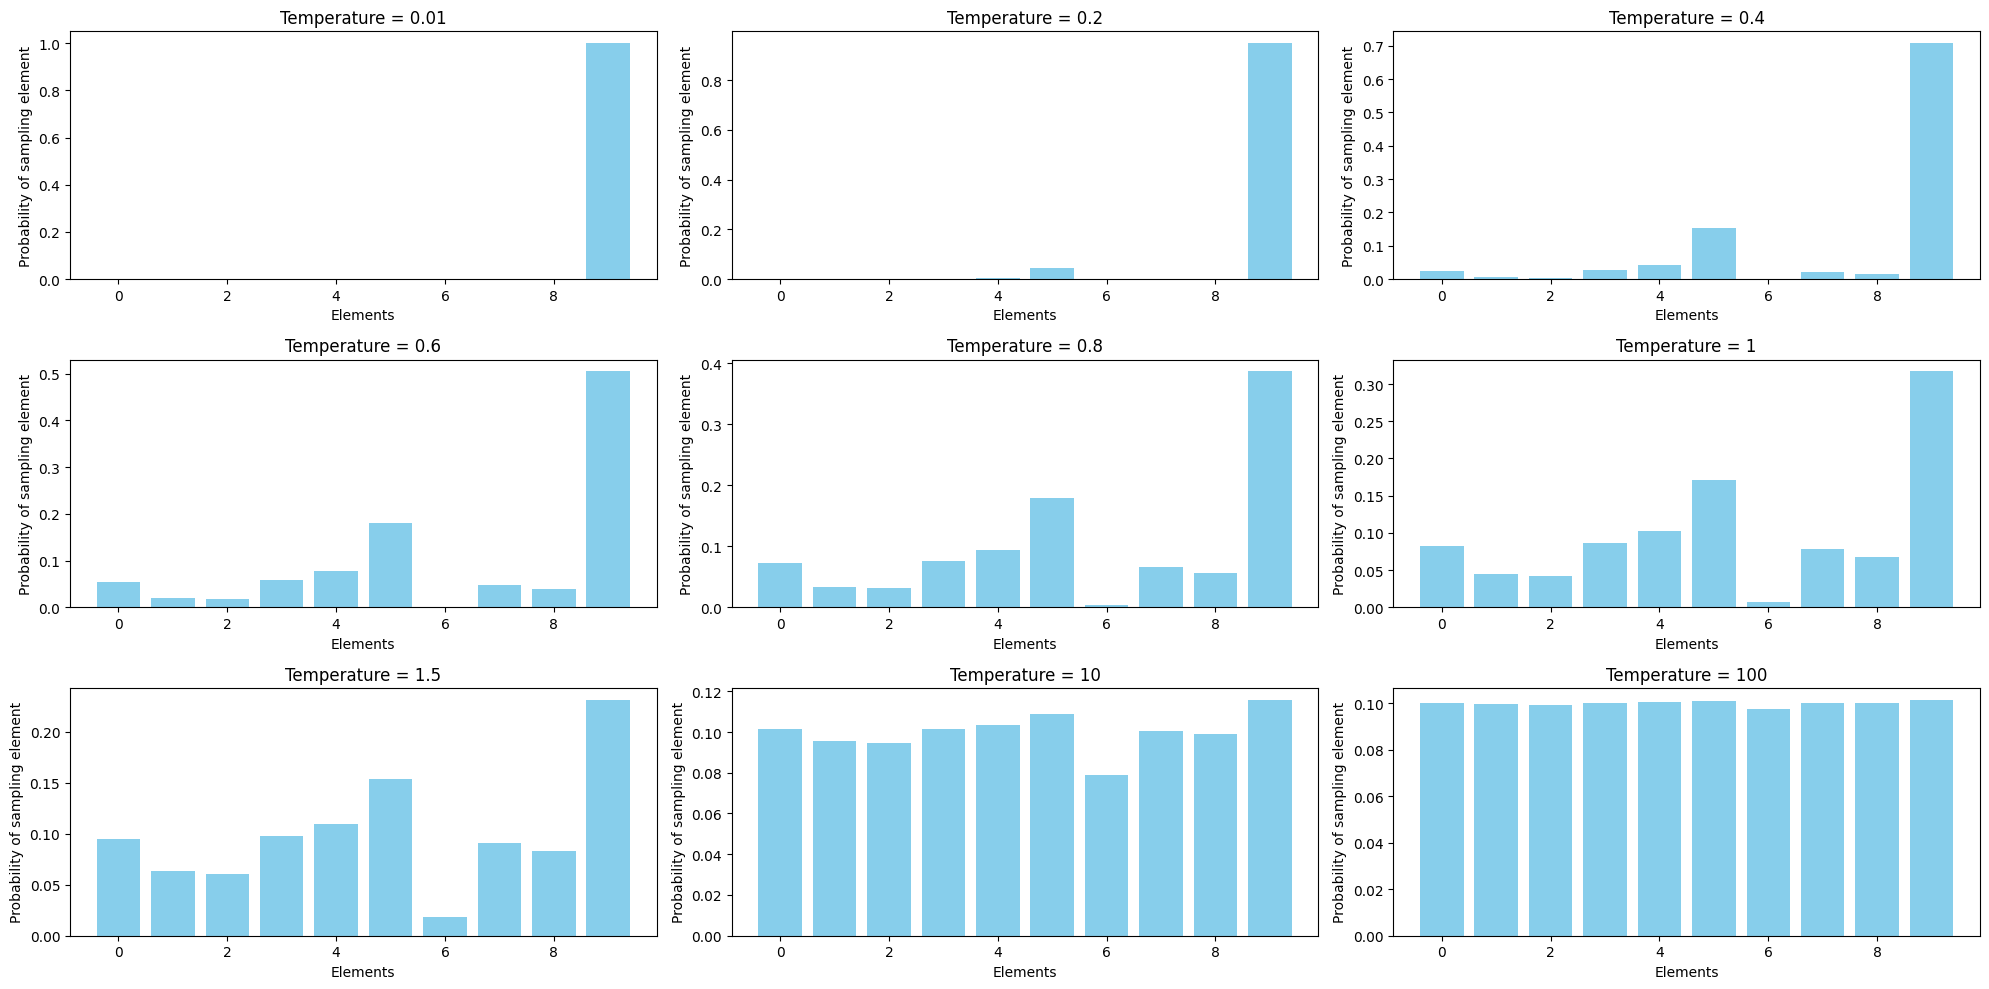

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(20, 10))

temperature = [0.01, 0.2, 0.4, 0.6, 0.8, 1, 1.5, 10, 100]
k = 0
for i in range(3):
    for j in range(3):
        reweight_outputs = reweight_distribution(
                        softmax(outputs), temperature[k])

        print(np.round(reweight_outputs, 2))
        ax[i,j].bar(range(len(outputs)), reweight_outputs, color='skyblue')

        ax[i,j].set_title(f'Temperature = {temperature[k]}')
        ax[i,j].set_xlabel('Elements')
        ax[i,j].set_ylabel('Probability of sampling element')
        k+=1


fig.tight_layout()
plt.show()


In [43]:
# Downloading and uncompressing the IMDB movie reviews dataset
!wget https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
!tar -xf aclImdb_v1.tar.gz

--2024-04-12 10:32:20--  https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84125825 (80M) [application/x-gzip]
Saving to: ‘aclImdb_v1.tar.gz’

aclImdb_v1.tar.gz   100%[===================>]  80.23M  41.3MB/s    in 1.9s    

2024-04-12 10:32:23 (41.3 MB/s) - ‘aclImdb_v1.tar.gz’ saved [84125825/84125825]



In [44]:
import tensorflow as tf
from tensorflow import keras

In [45]:
# Creating a dataset from text files (one file = one sample)

dataset = keras.utils.text_dataset_from_directory(
    directory="aclImdb", label_mode=None, batch_size=256
)

# Strip the <br /> HTML tag that occurs in many of the reviews.
#        This did not matter much for text classification,
#        but we wouldn’t want to generate <br /> tags in this example!
dataset = dataset.map(lambda x: tf.strings.regex_replace(x, "<br />", " "))

Found 100006 files belonging to 1 classes.


In [46]:
# Iterate over the dataset to get a batch of data
for data_batch in dataset.take(1):
    texts = data_batch.numpy()  # Convert the tensor to numpy array

# Print the first few examples
for i in range(5):
    print("Example", i+1, ": ", texts[i], "\n")

Example 1 :  b'I had the opportunity to catch this one at a private screening last week. Finally a film that has not been over hyped and does not pretend to be anything else than what it is supposed be, violent B entertainment. I do not want to say much because this one holds a few surprises (you wont forget the opening sequence, actually that is if you can sit through it!!) but its premise is not overly complicated, here is all you need to now for now: A man seeks revenge against a crime syndicate responsible for the brutal murder of his wife.  Directed by Christian Viel (Evil Breed) and starring John Fallon (who also wrote it) Deaden is pretty straightforward. For about an hour and a half, you witness the main character endless descent into hell and self abuse in his search for vindication. Absolutely tongue and cheek, this movie, even if flawed at times, is not limited by its micro budget and still manages to entertain. You can see these guys had a blast making it. Fast paced, graph

In [47]:
# Preparing a TextVectorization layer

from tensorflow.keras.layers import TextVectorization


# We’ll only consider the top 15,000 most
# common words—anything else will be treated
# as the out-of-vocabulary token, "[UNK]".

sequence_length = 100
vocab_size = 15000

# We want to return integer word index sequences.
# We’ll work with inputs and targets
# of length 100 (but since we’ll offset the
# targets by 1, the model will actually
# see sequences of length 99).

text_vectorization = TextVectorization(
    max_tokens=vocab_size,
    output_mode="int",
    output_sequence_length=sequence_length,
)

text_vectorization.adapt(dataset)

In [48]:
# Setting up a language modeling dataset

def prepare_lm_dataset(text_batch):

    # Convert a batch of texts (strings) to a batch of integer sequences.
    vectorized_sequences = text_vectorization(text_batch)

    # Create inputs by cutting off the last word of the sequences.
    x = vectorized_sequences[:, :-1]

    # Create targets by offsetting the sequences by 1.
    y = vectorized_sequences[:, 1:]

    return x, y

lm_dataset = dataset.map(prepare_lm_dataset, num_parallel_calls=4)

In [55]:
for data_batch in dataset.take(1):
    print(data_batch[0])
    print(text_vectorization(data_batch[0]))

    break

tf.Tensor(b"Based on Christy Brown's autobiographical novel, this endearing film tells the story of his life, him being affected by cerebral palsy and being considered basically not a person by everyone including his mother. Amazingly, he teaches himself to draw and write using his foot, which is the only part of him he can control. An amazing story of courage with a truly amazing and unforgettable oscar winning performance by Daniel Day Lewis. 9 of 10", shape=(), dtype=string)
tf.Tensor(
[  436    20  9146  8918 12088   676    11  3671    19   696     2    64
     5    24   119    85   106  3919    32  7740     1     3   106  1205
   648    22     4   401    32   304   579    24   417  2591    27  4835
   307     6  2350     3   940   768    24  2694    61     7     2    62
   169     5    85    27    67  1132    33   504    64     5  3039    15
     4   362   504     3  3183   948  2043   235    32  2522   261  1837
  1354     5   301     0     0     0     0     0     0     0     0  

In [59]:
# Get the vocabulary mapping
vocabulary = text_vectorization.get_vocabulary()

# Create a dictionary mapping word indices to words
word_index_map = {word: index for index, word in enumerate(vocabulary)}

In [69]:
word_index_map
word_index_map['on']


20

# A TRANSFORMER-BASED SEQUENCE-TO-SEQUENCE MODEL

In [70]:
from tensorflow.keras import layers

class PositionalEmbedding(layers.Layer):
    def __init__(self, sequence_length, input_dim, output_dim, **kwargs):
        super().__init__(**kwargs)
        self.token_embeddings = layers.Embedding(
            input_dim=input_dim, output_dim=output_dim)
        self.position_embeddings = layers.Embedding(
            input_dim=sequence_length, output_dim=output_dim)
        self.sequence_length = sequence_length
        self.input_dim = input_dim
        self.output_dim = output_dim

    def call(self, inputs):
        length = tf.shape(inputs)[-1]
        positions = tf.range(start=0, limit=length, delta=1)
        embedded_tokens = self.token_embeddings(inputs)
        embedded_positions = self.position_embeddings(positions)
        return embedded_tokens + embedded_positions

    def compute_mask(self, inputs, mask=None):
        return tf.math.not_equal(inputs, 0)

    def get_config(self):
        config = super(PositionalEmbedding, self).get_config()
        config.update({
            "output_dim": self.output_dim,
            "sequence_length": self.sequence_length,
            "input_dim": self.input_dim,
        })
        return config

In [71]:
class TransformerDecoder(layers.Layer):
    def __init__(self, embed_dim, dense_dim, num_heads, **kwargs):
        super().__init__(**kwargs)
        self.embed_dim = embed_dim
        self.dense_dim = dense_dim
        self.num_heads = num_heads
        self.attention_1 = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=embed_dim)
        self.attention_2 = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=embed_dim)
        self.dense_proj = keras.Sequential(
            [layers.Dense(dense_dim, activation="relu"),
             layers.Dense(embed_dim),]
        )
        self.layernorm_1 = layers.LayerNormalization()
        self.layernorm_2 = layers.LayerNormalization()
        self.layernorm_3 = layers.LayerNormalization()
        self.supports_masking = True

    def get_config(self):
        config = super().get_config()
        config.update({
            "embed_dim": self.embed_dim,
            "num_heads": self.num_heads,
            "dense_dim": self.dense_dim,
        })
        return config

    def get_causal_attention_mask(self, inputs):
        input_shape = tf.shape(inputs)
        batch_size, sequence_length = input_shape[0], input_shape[1]
        i = tf.range(sequence_length)[:, tf.newaxis]
        j = tf.range(sequence_length)
        mask = tf.cast(i >= j, dtype="int32")
        mask = tf.reshape(mask, (1, input_shape[1], input_shape[1]))
        mult = tf.concat(
            [tf.expand_dims(batch_size, -1),
             tf.constant([1, 1], dtype=tf.int32)], axis=0)
        return tf.tile(mask, mult)

    def call(self, inputs, encoder_outputs, mask=None):
        causal_mask = self.get_causal_attention_mask(inputs)
        if mask is not None:
            padding_mask = tf.cast(
                mask[:, tf.newaxis, :], dtype="int32")
            padding_mask = tf.minimum(padding_mask, causal_mask)
        else:
            padding_mask = mask
        attention_output_1 = self.attention_1(
            query=inputs,
            value=inputs,
            key=inputs,
            attention_mask=causal_mask)
        attention_output_1 = self.layernorm_1(inputs + attention_output_1)
        attention_output_2 = self.attention_2(
            query=attention_output_1,
            value=encoder_outputs,
            key=encoder_outputs,
            attention_mask=padding_mask,
        )
        attention_output_2 = self.layernorm_2(
            attention_output_1 + attention_output_2)
        proj_output = self.dense_proj(attention_output_2)
        return self.layernorm_3(attention_output_2 + proj_output)

In [76]:

embed_dim = 256
latent_dim = 2048
num_heads = 2

inputs = keras.Input(shape=(None,), dtype="int64")
x = PositionalEmbedding(sequence_length, vocab_size, embed_dim)(inputs)
x = TransformerDecoder(embed_dim, latent_dim, num_heads)(inputs=x, encoder_outputs=x)
outputs = layers.Dense(vocab_size, activation="softmax")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="sparse_categorical_crossentropy", optimizer="rmsprop")

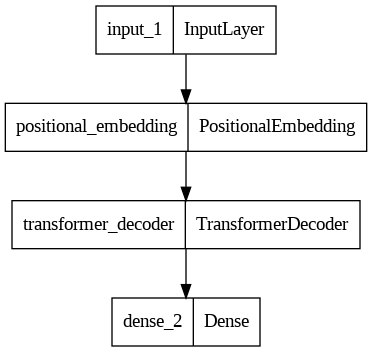

In [73]:
keras.utils.plot_model(model)

In [74]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None)]               0         []                            
                                                                                                  
 positional_embedding (Posi  (None, None, 256)            3865600   ['input_1[0][0]']             
 tionalEmbedding)                                                                                 
                                                                                                  
 transformer_decoder (Trans  (None, None, 256)            2104576   ['positional_embedding[0][0]',
 formerDecoder)                                                      'positional_embedding[0][0]']
                                                                                              

In [77]:
# np.random.multinomial(n=1, pvals=[1/6.]*6, size=1)
# np.argmax(np.random.multinomial(n=1, pvals=[0.5,0.5,0,0,0,0], size=1))


In [ ]:
import numpy as np

# Dict that maps word indices back to strings, to be used for text decoding
tokens_index = dict(enumerate(text_vectorization.get_vocabulary()))

def sample_next(predictions, temperature=1.0):
    # Implements variable-temperature sampling from a probability distribution

    predictions = np.asarray(predictions).astype("float64")
    predictions = np.log(predictions) / temperature
    exp_preds = np.exp(predictions)
    predictions = exp_preds / np.sum(exp_preds)

    probas = np.random.multinomial(1, predictions, 1)
    return np.argmax(probas)

class TextGenerator(keras.callbacks.Callback):
    def __init__(
            self,
            prompt,             # Prompt that we use to seed text generation
            generate_length,    # How many words
            model_input_length,
            temperatures=(1.,), # Range of temperatures to use for sampling
            print_freq=1):

        self.prompt = prompt
        self.generate_length = generate_length
        self.model_input_length = model_input_length
        self.temperatures = temperatures
        self.print_freq = print_freq
        vectorized_prompt = text_vectorization([prompt])[0].numpy()
        self.prompt_length = np.nonzero(vectorized_prompt == 0)[0][0]

    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % self.print_freq != 0:
            return
        for temperature in self.temperatures:
            print("== Generating with temperature", temperature)

            # When generating text, we start from our prompt.
            sentence = self.prompt
            for i in range(self.generate_length):
                # Feed the current sequence into our model.
                tokenized_sentence = text_vectorization([sentence])
                predictions = self.model(tokenized_sentence)

                # Retrieve the predictions for the last timestep, and use them
                # to sample a new word.
                next_token = sample_next(
                    predictions[0, self.prompt_length - 1 + i, :]
                )
                sampled_token = tokens_index[next_token]
                sentence += " " + sampled_token
            print(sentence)

prompt = "This movie"
text_gen_callback = TextGenerator(
    prompt,
    generate_length=50,
    model_input_length=sequence_length,
    temperatures=(0.2, 0.5, 0.7, 1., 1.5))


In [ ]:
model.fit(lm_dataset, epochs=200, callbacks=[text_gen_callback])

Epoch 1/200
391/391 [==============================] - ETA: 0s - loss: 5.9241== Generating with temperature 0.2
This movie is atrocious i [UNK] to perform at a bad good on because of him all changing this planet [UNK] than the actual clothes for the same simpsons he doesnt play the top dad must be the english on measure both almost given her the hardboiled to troop any lot more
== Generating with temperature 0.5
This movie are so after all in the investigation that were based on all the competing are in a likes to revolutionary a lengths for the gore translates you dont think the unique in every big screen musical freak is the fantasy comedy has centered around shot my range of course just
== Generating with temperature 0.7
This movie is standing in no one of which one but such discovered of his henriksen watching a man who comes out contain graphic pool as far along with an call them jurassic i have to this moving as a attacks and chaplin where would they watched their own trying to b